# Projet numérique

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
$(E) \begin{cases} \dot{x_1} = x_1(\alpha − \beta x_2) \\ \dot{x_2} = −x_2(\gamma − \delta x_1) \end{cases}$

$\begin{array}{ccccc}
Soit \; f & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
 & & (x_1,x_2) & \mapsto & (x_1(\alpha − \beta x_2),−x_2(\gamma − \delta x_1)) \\
\end{array}$

où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement.

## Question 1

$ \dot{x_1} $ et $ \dot{x_2} $ sont les croissances démographiques des deux espèces

$\alpha$ est le taux de reproduction des proies (1)

$\beta$ est le taux de proies (1) mangées par les prédateurs (2)

$\gamma$ est le taux de mortalité des prédateurs

$\delta$ est le profit des prédateurs (2) lié au taux de proies mangées (1)

A l'équilibre (on suppose que tous les facteurs sont non nuls):

On a donc: $\begin{cases} \dot{x_1} =0 \\ \dot{x_2} = 0\end{cases}$

Si $x_1$ est nul à l'équilibre, $x_2$ est nul nécessairement, sinon les solutions divergent

On étudie la stabilité de ce point fixe avec la jacobienne de f évaluée en $x_{eq1}=0$

$J_f(x_{eq1})=
\begin{pmatrix}
\alpha & 0 \\
0 & -\gamma  
\end{pmatrix}
$

$\alpha > 0$ est valeur propre de cette matrice, donc l'équilibre est instable

Sinon, on a nécessairement $x_{eq2} = (x_1,x_2)=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

$J_f(x_{eq2})=
\begin{pmatrix}
0 & -\frac{\beta \gamma}{ \delta} \\
\frac{\delta \alpha}{\beta} & 0
\end{pmatrix}
$

Les valeurs propres sont les deux des imaginaires purs, donc à partie réelle nulle: on ne peut pas conclure à propos de la stabilité de cet équilibre


## Question 2

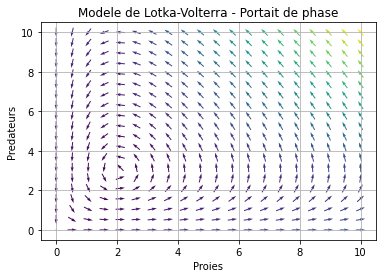

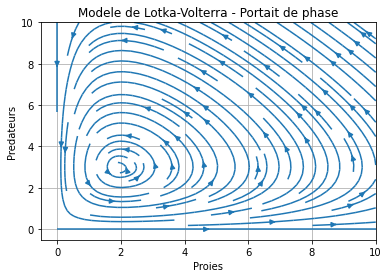

In [2]:
a = 3 #alpha
b = 1 #beta
g = 2 #gamma
d = 1 #delta
X0 = np.array([4,1])
t = np.linspace(0,20,1000)
xmax = 10
ymax = 10
nb_points = 20


def LotkaVolterra(X,t=0):
    return np.array([a*X[0] - b*X[0]*X[1],d*X[0]*X[1] - g*X[1]])


x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X1 , Y1  = np.meshgrid(x, y)
DX1, DY1 = LotkaVolterra([X1, Y1]) #calcul des variations de populations
M = (np.hypot(DX1, DY1)) # calcul de la norme d'une fleche, hypotenuse d'un TR         
M [M == 0] = 1. #pour eviter les divisions par zero
DX1 /= M # normalisation de la norme d'une fleche
DY1 /= M

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot = 'middle')
plt.title('Modele de Lotka-Volterra - Portait de phase')
plt.xlabel('Proies')
plt.ylabel('Predateurs')
plt.grid(True)
plt.show()

Q = plt.streamplot(X1,Y1,DX1,DY1)
plt.title('Modele de Lotka-Volterra - Portait de phase')
plt.xlabel('Proies')
plt.ylabel('Predateurs')
plt.grid(True)
plt.show()

On a ici deux points d'équilibres : $(0,0)$ et $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

Interprétation?

## Question 3

Toutes les expressions étant polynomiales, les fonctions sont continûment différentiables.

$\newline$

Si initialement $x_{10}=0$ et $x_{20}>0$:

On a $\dot{x_{10}}=0$ initialement. Donc $\forall t : x_{1}(t)=0$

De même, si $x_{10}>0$ et $x_{20}=0$: $\forall t : x_{2}(t)=0$

$\newline$

Si on a une solution initiale $(x_{10},x_{20})$ avec  $x_{10}>0$ et $x_{20}>0$

Supposons par l'absure que $\exists t: x_1(t)=0$

Le théorème de Cauchy-Lipschitz nous assure par unicité de la solution que $\forall t : x_{1}(t)=0$.

Absurde.

On procède de même si $\exists t: x_2(t)=0$

$x_1$ et $x_2$ étant continues, elles ne croiseront jamais l'axe des abscisses et dont: $\forall t: x_{1}(t)>0$ et $x_{2}(t)>0$


## Question 4

Soit x une solution de (E) initialisée dans $\mathbf{R}_{+}^{*} \times \mathbf{R}_{+}^{*}$

D'après le théorème de Peano-Arzelà, x est définie sur un intervale ouvert I non vide

On a $\forall t \in I,  \frac{d}{dt} H (x(t))=\delta \dot{x_1}(t) - \gamma \frac{\dot{x_1}}{x_1}(t) + \beta \dot{x_2}(t) - \alpha \frac {\dot{x_2}}{x_2}(t)$

$\frac{d}{dt} H (x(t))= \alpha \delta x_1-\delta \beta x_1 x_2- \gamma \alpha + \gamma \beta x_2 - \beta \gamma x_2 + \delta \beta x_1 x_2 +\alpha \gamma +\alpha \delta x_1=0$

**Donc $H$ est la fonction constante égale à $H_0$ sur $I$**


Montrons que $H$ est définie sur $\mathbf{R}$ pour toute solution maximale définie sur $\mathbf{R}_{+}^{*} \times \mathbf{R}_{+}^{*}$

Soit x une solution maximale de (E) initialisée dans $\mathbf{R}_{+}^{*} \times \mathbf{R}_{+}^{*}$


D'après le cours l'intervale de définition est de la forme $I=]t_1,t_2[$ avec $(t_1,t_2)\in \overline{\mathbb{R}}^{2}$

Montrons que $t_1$ et $t_2$ sont infinis

Supposons par l'absurde que $t_1 \in \mathbb{R}$

D'après le théorème du domaine maximal d'existence:

Soit $\lim_{t\to t_1} x(t)= +\infty$. Dans ce cas, H diverge, ce qui est absurde

Soit $\lim_{t\to t_1} x(t)= x_{\infty}$ où $x_{\infty}$ appartient à la frontière de $\mathbf{R}_{+}^{*} \times \mathbf{R}_{+}^{*}$, ce qui est impossible d'après la quesiton précédente

**On a bien le résultat voulu**



## Question 5

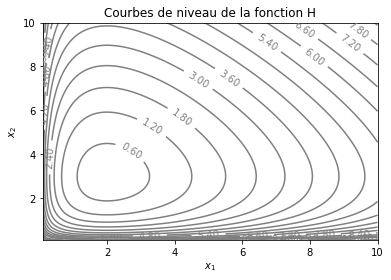

In [3]:
def H(x1,x2):
    return d*x1 - g*np.log(x1) + b*x2 - a*np.log(x2)

x , y = np.meshgrid(np.linspace(0.1,10,201),np.linspace(0.1,10,201))
z = H(x,y)

plt.figure(1)
graphe = plt.contour(x,y,z,20,colors="grey")
plt.clabel(graphe,inline=1,fontsize=10,fmt='%3.2f')
plt.xlabel(r"$x_{1}$")
plt.ylabel(r"$x_{2}$")
plt.title("Courbes de niveau de la fonction H")
plt.show()

On devine la position de $x_{eq2}$ au centre du diagramme. Etant un point où la fonction de Lyapunov est nulle, l'équilibre est stable

## Question 6

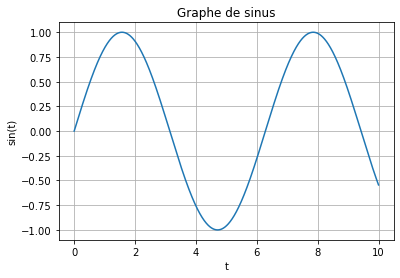

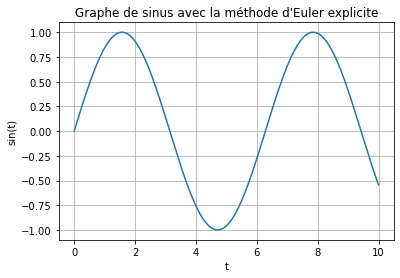

In [4]:
def solve_euler_explicite(f,x0,dt,t0,tf):
    t = t0
    x = x0
    X = np.array([x0])
    T = np.array([t0])
    
    while t<tf :
        x = X[-1] + dt * f(x,t)
        t = t+dt
        
        X = np.append(X,[x],axis=0)
        T = np.append(T,[t],axis=0)
        
    return T,X

#Test avec la fonction cosinus dont l'intégrale depuis t=0 est la fonction sinus


def f(x,t):
    return np.cos(t)

T,Y = solve_euler_explicite(f,0,0.001,0,10)

plt.plot(T,np.sin(T))
plt.title("Graphe de sinus")
plt.xlabel("t")
plt.ylabel("sin(t)")
plt.grid(True)
plt.show()

plt.plot(T,Y)
plt.title("Graphe de sinus avec la méthode d'Euler explicite")
plt.xlabel("t")
plt.ylabel("sin(t)")
plt.grid(True)
plt.show()

La méthode est stable puisque lorsque le pas tend vers zéro, le graphe s'approche de la solution exacte. Le schéma d'Euler explicite étant aussi consistant d'ordre 1, par le théorème de Lax on a la convergence aussi d'ordre 1. On peut la déterminer graphiquement comme suit :

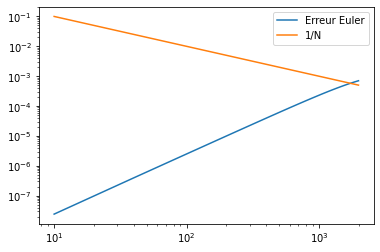

In [5]:
N = 2000
VN = np.arange(10,N,30)

def err_tronc(X1,X2):
    return np.max(abs(np.array(X1)-np.array(X2)))

def erreur_Euler(f,y,x0,dt,t0,N):
    """
    Prend en argument la fonction f telle que x'=f(x,t), la fonction y solution exacte de l'equation differentielle precedente,
    les conditions initiales x0 au temps t0, le pas dt et le nombre d'iterations voulues N
    Renvoie le max des erreurs de troncatures
    """
    
    tf = t0 + dt*N #temps final
    
    #Calcul de X_Euler
    
    T,X_euler = solve_euler_explicite(f,x0,dt,t0,tf)
    
    #Calcul de X_vraie

    X_vraie = y(T)
    
    return err_tronc(X_euler,X_vraie)

E = [] #liste des erreurs de troncatures par nombre d'itérations

for n in VN:
    E.append(erreur_Euler(f,np.sin,0,0.001,0,n))

plt.plot(VN,E)
plt.plot(VN,1/VN)
plt.legend(["Erreur Euler","1/N"])
plt.xscale("log")
plt.yscale("log")
plt.show()

## Question 7

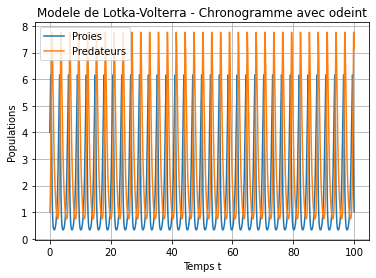

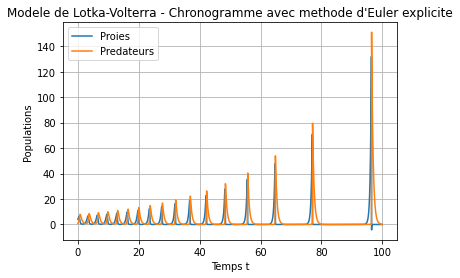

In [6]:
X0 = np.array([4,1])
t0 = 0
tf = 100
N = 10000
t = np.linspace(t0,tf,N)
dt = (tf-t0)/N

#Methode avec odeint de scipy.integrate

X = odeint(LotkaVolterra,X0,t)

proies,predateurs = X.T #on prend les colonnes de la transposee de X

plt.plot(t,proies)
plt.plot(t,predateurs)
plt.legend(["Proies","Predateurs"])
plt.title("Modele de Lotka-Volterra - Chronogramme avec odeint")
plt.xlabel("Temps t")
plt.ylabel("Populations")
plt.grid(True)
plt.show()

#Avec la methode d'Euler explicite

T,X = solve_euler_explicite(LotkaVolterra, X0, dt, t0, tf)

proies,predateurs = X.T #on prend les colonnes de la transposee de X

plt.plot(T,proies)
plt.plot(T,predateurs)
plt.legend(["Proies","Predateurs"])
plt.title("Modele de Lotka-Volterra - Chronogramme avec methode d'Euler explicite")
plt.xlabel("Temps t")
plt.ylabel("Populations")
plt.grid(True)
plt.show()

On constate qu'au bout d'un certain temps, les périodes d'évolution s'allongent, et les valeurs des pics ne sont plus constantes et augmentent : on retrouve ici le caractère instable de la méthode d'Euler explicite. Cette résolution n'est donc pas fidèle à la réalité dont se rapproche la méthode de odeint, où les variations de population restent stables (dans le cadre de ce modèle).

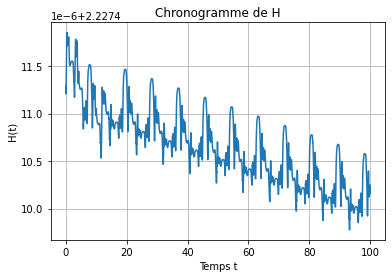

<ipython-input-3-3842620dd0d7>:2: RuntimeWarning: invalid value encountered in log
  return d*x1 - g*np.log(x1) + b*x2 - a*np.log(x2)


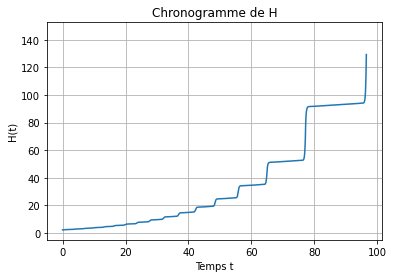

In [9]:
#Version avec odeint

X = odeint(LotkaVolterra,X0,t)

proies,predateurs = X.T #on prend les colonnes de la transposee de X

VH = H(proies,predateurs)

plt.figure(1)
plt.plot(t,VH)
plt.title("Chronogramme de H")
plt.xlabel("Temps t")
plt.ylabel("H(t)")
plt.grid(True)
plt.show()

#Version avec Euler explicite

T,X = solve_euler_explicite(LotkaVolterra, X0, dt, t0, tf)

proies,predateurs = X.T #on prend les colonnes de la transposee de X

VH = H(proies,predateurs)

plt.figure(1)
plt.plot(t,VH[:-1])
plt.title("Chronogramme de H")
plt.xlabel("Temps t")
plt.ylabel("H(t)")
plt.grid(True)
plt.show()

La fonction de Lyapunov ne se conserve pas le long des trajectoires avec la méthode d'Euler explicite, contrairement au cas avec odeint où ses variations sont infimes.

## Question 8

In [ ]:
def solve_euler_implicite(f,x0,dt,t0,tf,epsilon):
    t = t0
    x = x0
    X = np.array([x0])
    T = np.array([t0])
    
    while t<tf :
        x_init = X[-1] + dt * f(x,t)
        x = x_init
        t = t+dt
        erreur = epsilon + 1
        i=1
        while erreur>epsilon :
            xk = x
            xk_plus_1 = X[-1] + dt * f(xk,t)
            erreur = np.linalg.norm((xk_plus_1 - xk) / x_init)
        
        x = xk_plus_1
        
        X = np.append(X,[x],axis=0)
        T = np.append(T,[t],axis=0)
    return T,X



def f(x,t):
    return np.cos(t)

T,Y = solve_euler_implicite(f,0,0.001,0,10,0.01)

plt.plot(T,np.sin(T))
plt.title("Graphe de sinus")
plt.xlabel("t")
plt.ylabel("sin(t)")
plt.grid(True)
plt.show()

plt.plot(T,Y)
plt.title("Graphe de sinus avec la méthode d'Euler implicite")
plt.xlabel("t")
plt.ylabel("sin(t)")
plt.grid(True)
plt.show()


plt.plot(T,Y-np.sin(T))
plt.title("Graphe de l'erreur")
plt.xlabel("t")
plt.ylabel("erreur")
plt.grid(True)
plt.show()

In [ ]:
X0 = np.array([4,1])
t0 = 0
tf = 100
N = 10000
t = np.linspace(t0,tf,N)
dt = (tf-t0)/N
eps = 0.01


#Avec la methode d'Euler explicite

T,X = solve_euler_implicite(LotkaVolterra, X0, dt, t0, tf, eps)

proies,predateurs = X.T #on prend les colonnes de la transposee de X

plt.plot(T,proies)
plt.plot(T,predateurs)
plt.legend(["Proies","Predateurs"])
plt.title("Modele de Lotka-Volterra - Chronogramme avec methode d'Euler implicite")
plt.xlabel("Temps t")
plt.ylabel("Populations")
plt.grid(True)
plt.show()

Cette fois-ci, la méthode d'Euler implicite est stable, mais les populations tendent vers 0. Aucune des deux variantes de la méthode d'Euler ne convient bien...

## Question 9

Soit $(E') \begin{cases} \dot{x_1} = x_1(\alpha − \beta x_2)-u_1(x_1, x_2)(H(x_1, x_2) − H_0) \\ \dot{x_2} = −x_2(\gamma − \delta x_1) − u_2(x_1, x_2)(H(x_1, x_2) − H_0) \end{cases}$

Montrons que x solution de (E) $\iff$ x solution de (E')

**Sens direct**

Si x est solution de (E), d'après la question précédente $H(x_1, x_2) = H_0$ en tout point de la solution:

x est solution de (E')

**Réciproquement**

Si y est solution de (E') initialisée en $x_0$

Si x est solution de (E) initialisée en $x_0$, elle est aussi solution de (E') d'après le sens direct

Ainsi, u étant continuement différentiable, on peut utiliser le théorème de Cauchy-Lipschitz, qui nous garantit l'unicité de la solution: $x=y$

y est solution de (E)

**Le résultat est prouvé par double implication**

## Question 10

## Question 11